In [1]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

#print (s1 + s2).dropna()
#print (s1 + s2).fillna(0)
#f1 = (s1 + s2).fillna(s2)
#f2 = (s1 + s2).fillna(s1)
#print s1.update(s2)
f1 = s1.to_frame()
f2 = s2.to_frame()
print s1.add(s2, fill_value = 0)

s1 = "praveen jugraj"
print s1.split()
print s1.split()[1] + ", " + s1.split()[0]

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64
['praveen', 'jugraj']
jugraj, praveen


In [52]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


subway_df = pd.read_csv('nyc_subway_weather.csv')
print subway_df['ENTRIESn'].max()
print subway_df

Populating the interactive namespace from numpy and matplotlib
235774591
       UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0      R003  05-01-11  00:00:00   4388333  2911002              0.0   
1      R003  05-01-11  04:00:00   4388333  2911002              0.0   
2      R003  05-01-11  12:00:00   4388333  2911002              0.0   
3      R003  05-01-11  16:00:00   4388333  2911002              0.0   
4      R003  05-01-11  20:00:00   4388333  2911002              0.0   
5      R003  05-02-11  00:00:00   4388348  2911036             15.0   
6      R003  05-02-11  04:00:00   5818689  3874767             19.0   
7      R003  05-02-11  08:00:00   4388855  2911194            488.0   
8      R003  05-02-11  12:00:00   4389345  2911326            490.0   
9      R003  05-02-11  16:00:00   4389576  2911558            231.0   
10     R003  05-02-11  20:00:00   4389811  2911963            235.0   
11     R003  05-03-11  00:00:00   4389885  2912127             74.0   
12  

In [49]:
grouped = subway_df.groupby(['hour'])
entries_by_hour = grouped['hour','ENTRIESn'].mean()
#entries_by_hour.plot()
#plt.hist(entries_by_hour,bins=30)


    weather_lat  weather_lon  ENTRIESn_hourly  EXITSn_hourly
0     40.600204   -73.947723       648.422857     261.040000
1     40.603489   -73.958763       947.358974     801.143590
2     40.635826   -73.960793       947.285334     700.869301
3     40.651363   -73.694176       340.375984     367.500000
4     40.660004   -73.844849       196.851128     208.396992
5     40.679413   -73.851105       716.185847     519.481058
6     40.683052   -73.934715      1131.948581     840.790621
7     40.688591   -73.991272      1590.433722    1209.551303
8     40.689018   -73.996338      1047.402439     706.755380
9     40.700348   -73.887177       600.196702     298.514723
10    40.705288   -73.902756      1229.353770     866.966860
11    40.708031   -74.014870      2732.632267    1906.937810
12    40.713715   -73.947975      1155.548159     879.781870
13    40.717094   -73.962532      2640.291892    1621.935135
14    40.718239   -73.839005      1099.740492     815.882550
15    40.720570   -73.88

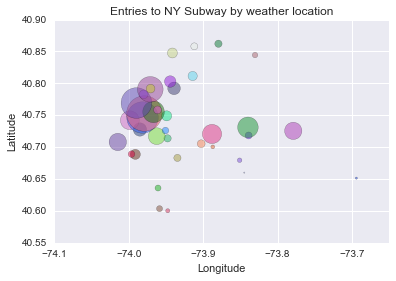

In [50]:
lat_lon_mean = subway_df.groupby(['weather_lat','weather_lon'], as_index=False)[['ENTRIESn_hourly',
                                                                        'EXITSn_hourly']].mean()

print lat_lon_mean
max_entries = lat_lon_mean['ENTRIESn_hourly'].max()
print max_entries
#N = len(max_entries)
area = np.pi * (20 * lat_lon_mean['ENTRIESn_hourly']/lat_lon_mean['ENTRIESn_hourly'].max())**2
print area
colors = np.random.rand(200,3)
plt.scatter(x=lat_lon_mean['weather_lon'],y=lat_lon_mean['weather_lat'],
            s=area,c=colors,alpha=0.5)
plt.title('Entries to NY Subway by weather location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

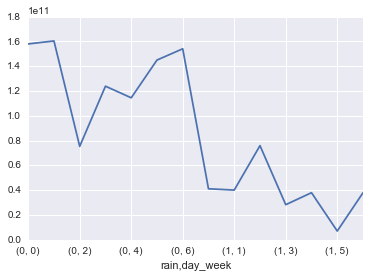

In [64]:
rain_group = subway_df.groupby(['rain','day_week'])#[['ENTRIESn_hourly','EXITSn_hourly']].mean()
rain_group['ENTRIESn'].sum().plot()